# Importing the Libraies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Importing the data

In [5]:
data = pd.read_csv("Store Sales.csv")

# Preprocessing

In [6]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Splitting the data

In [7]:
X = data_imputed.drop('Sales', axis=1)
y = data_imputed['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training and Testing the model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

differences = np.abs(y_test - y_pred)

Mean Squared Error: 83178515.39383943
R² Score: 0.9850424572911168


# Plotting

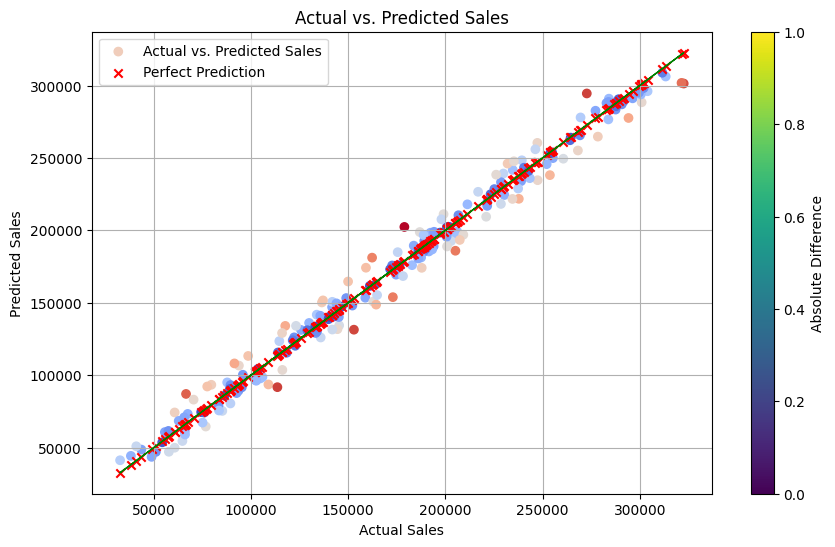

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=differences, cmap='coolwarm', marker='o', label='Actual vs. Predicted Sales')
plt.scatter(y_test, y_test, color='red', marker='x', label='Perfect Prediction')
plt.colorbar(label='Absolute Difference')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.plot(y_test, y_test, color='green', linestyle='-', linewidth=1)

plt.legend()
plt.grid(True)
plt.show()